    age - возраст
    job - профессия
    marital - семейный статус
    education - уровень образования
    default - было ли банкротство
    balance - сумма на балансе
    housing - есть ли жильё
    loan - есть ли кредиты
    contact - способ контактирования с клиентом
    day - сколько дней назад был взят займ
    month - в каком месяце был взят займ
    duration - длительность займа
    campaign - сколько раз человек брал займ
    y - решение банка

In [1]:
import pandas as pd

In [2]:
#Загружаем данных, удаляем повторы
data = pd.read_csv('bank.csv', sep=";").drop_duplicates()

In [3]:
#Выводим начало таблицы
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#Выводим конец таблицы
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
#Посмотрим на тип данных по столбцам
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [6]:
#Смотрим пропуски по столбцам
data.isnull().sum()
#Пропусков нет

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

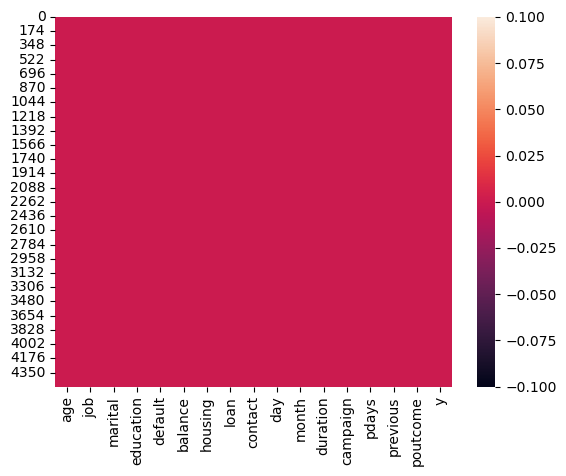

In [7]:
import seaborn as sns
sns.heatmap(pd.isnull(data))
#График пропусков в данных - пропусков не видно

In [8]:
#Посмотрим на характеристики распределения значений по столбцам
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
#Выведем числовые показатели
numerical = data.select_dtypes(include=['int64']).columns.tolist()
print(numerical)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [10]:
#Выведем категориальные показатели
categorical = data.select_dtypes(include='object').columns.tolist()
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


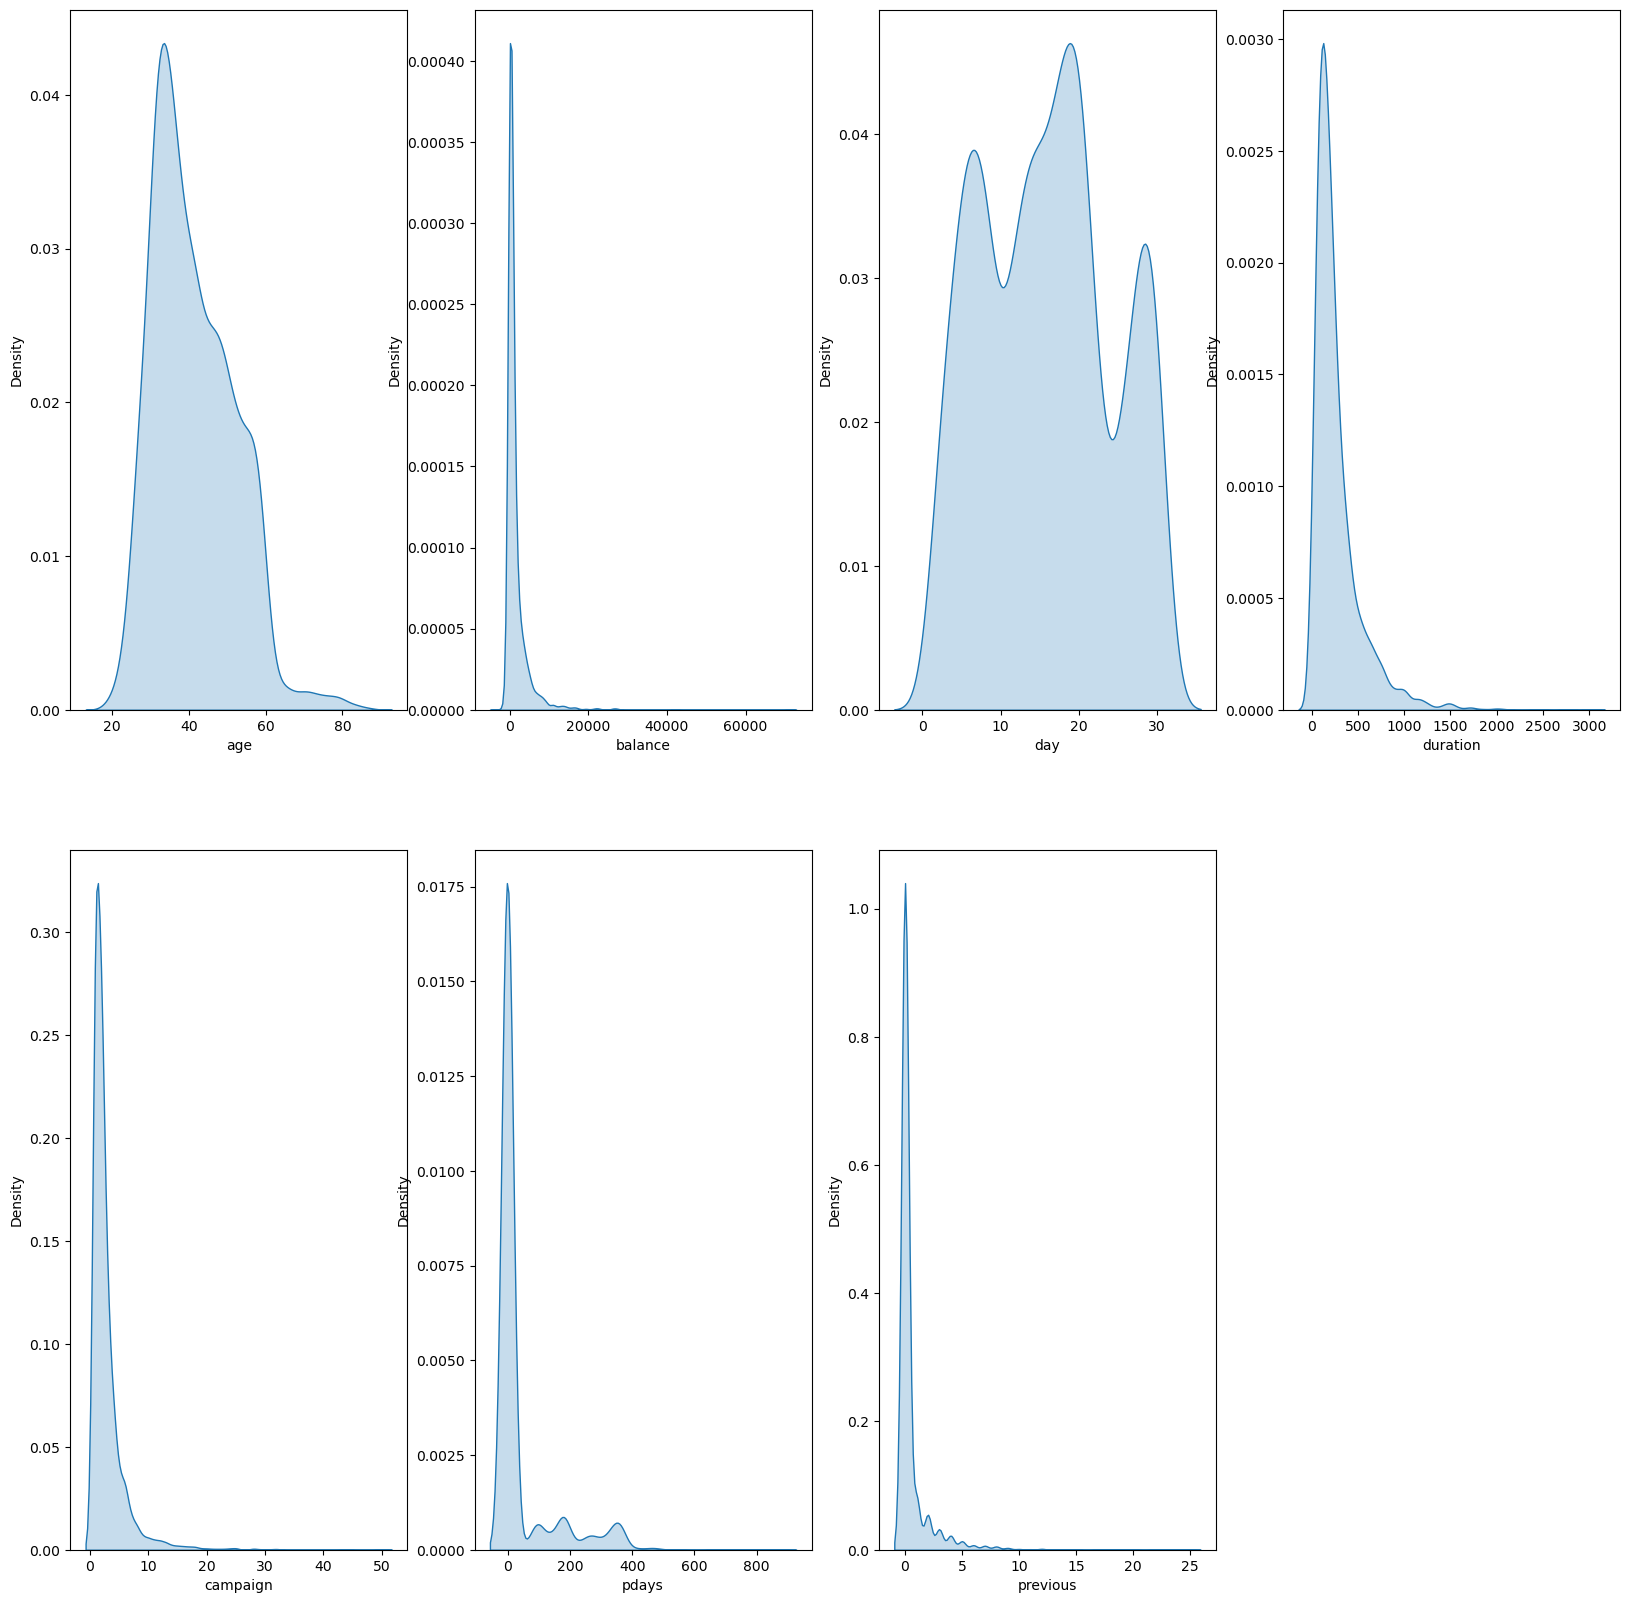

In [11]:
#Посмотрим на плотность распределения количественных переменных
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(data[numerical].columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=data[numerical], x=column, fill=True)
    ax.set_xlabel(column)
plt.show()

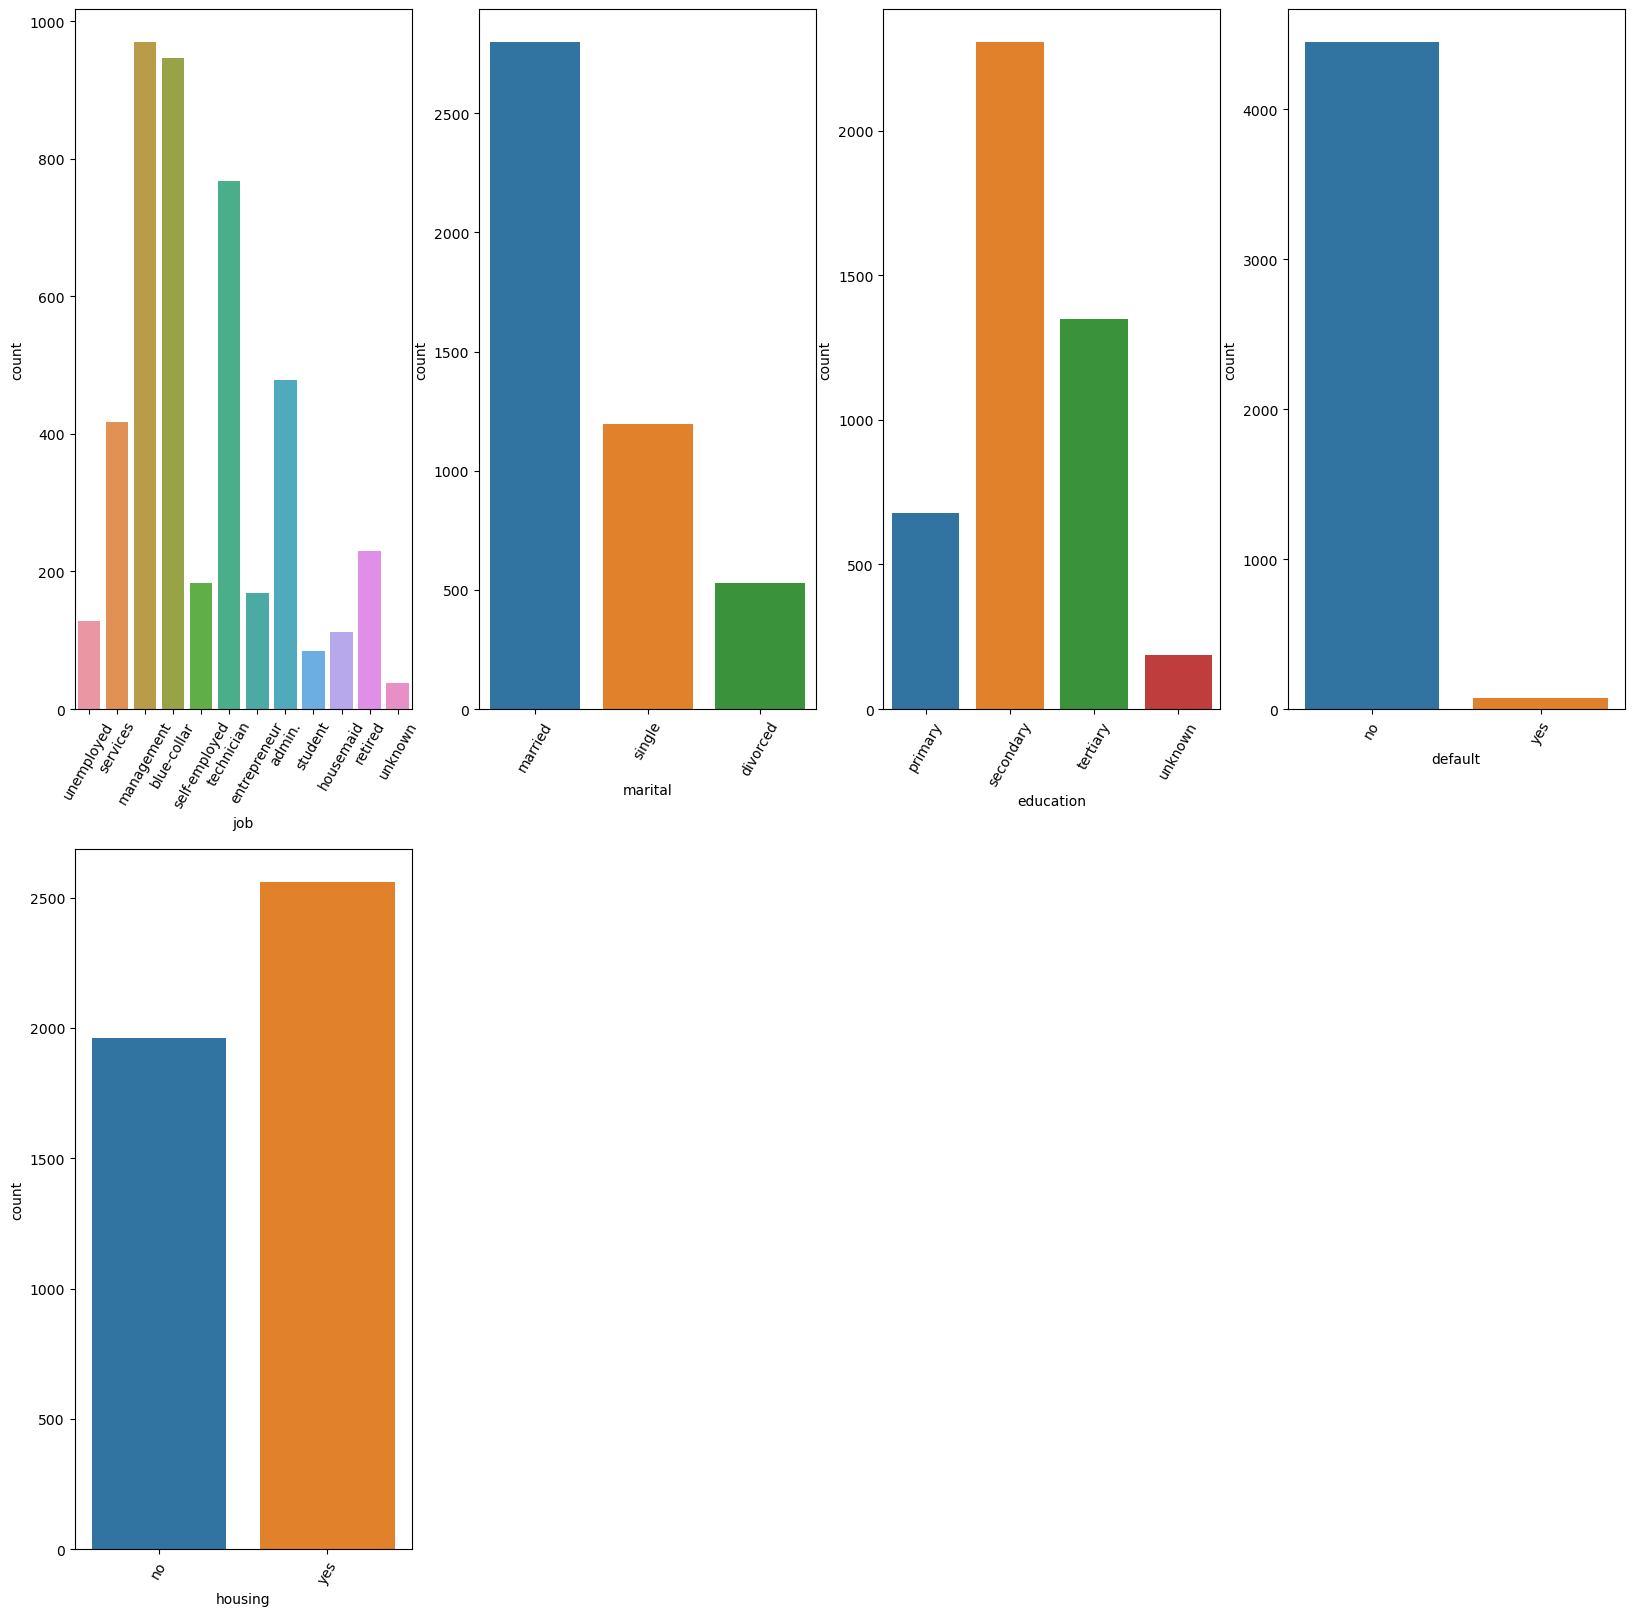

In [12]:
#Посмотрим на распределение категориальных переменных:
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(data[categorical].iloc[:, 0:5].columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=data[categorical], x=column, fill=True)
    ax.set_xlabel(column)
    plt.xticks(rotation=60)
plt.show()


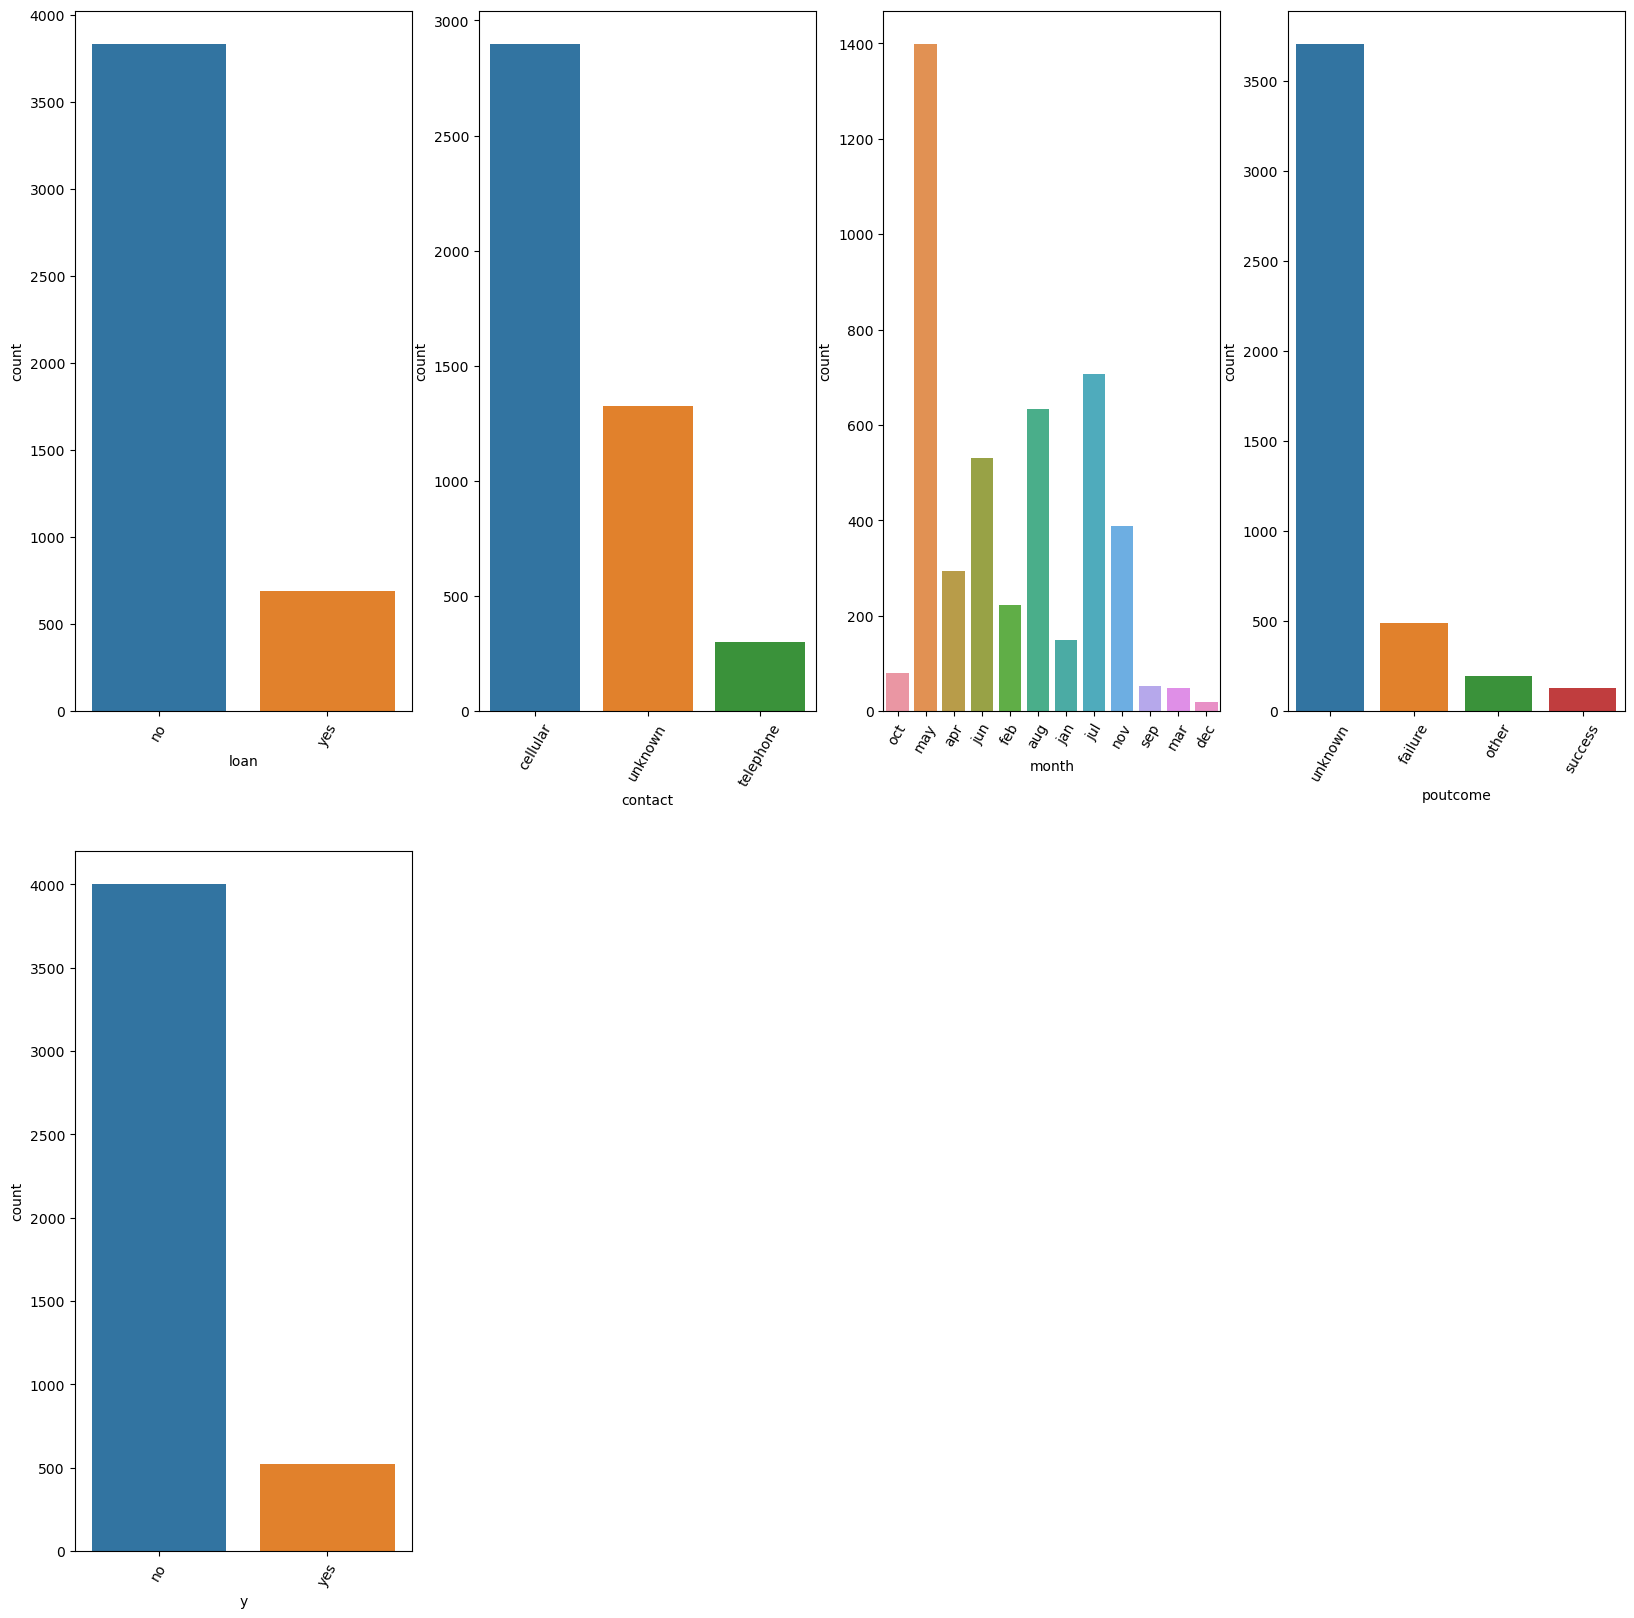

In [13]:
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(data[categorical].iloc[:, 5:10].columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=data[categorical], x=column, fill=True)
    ax.set_xlabel(column)
    plt.xticks(rotation=60)
plt.show()

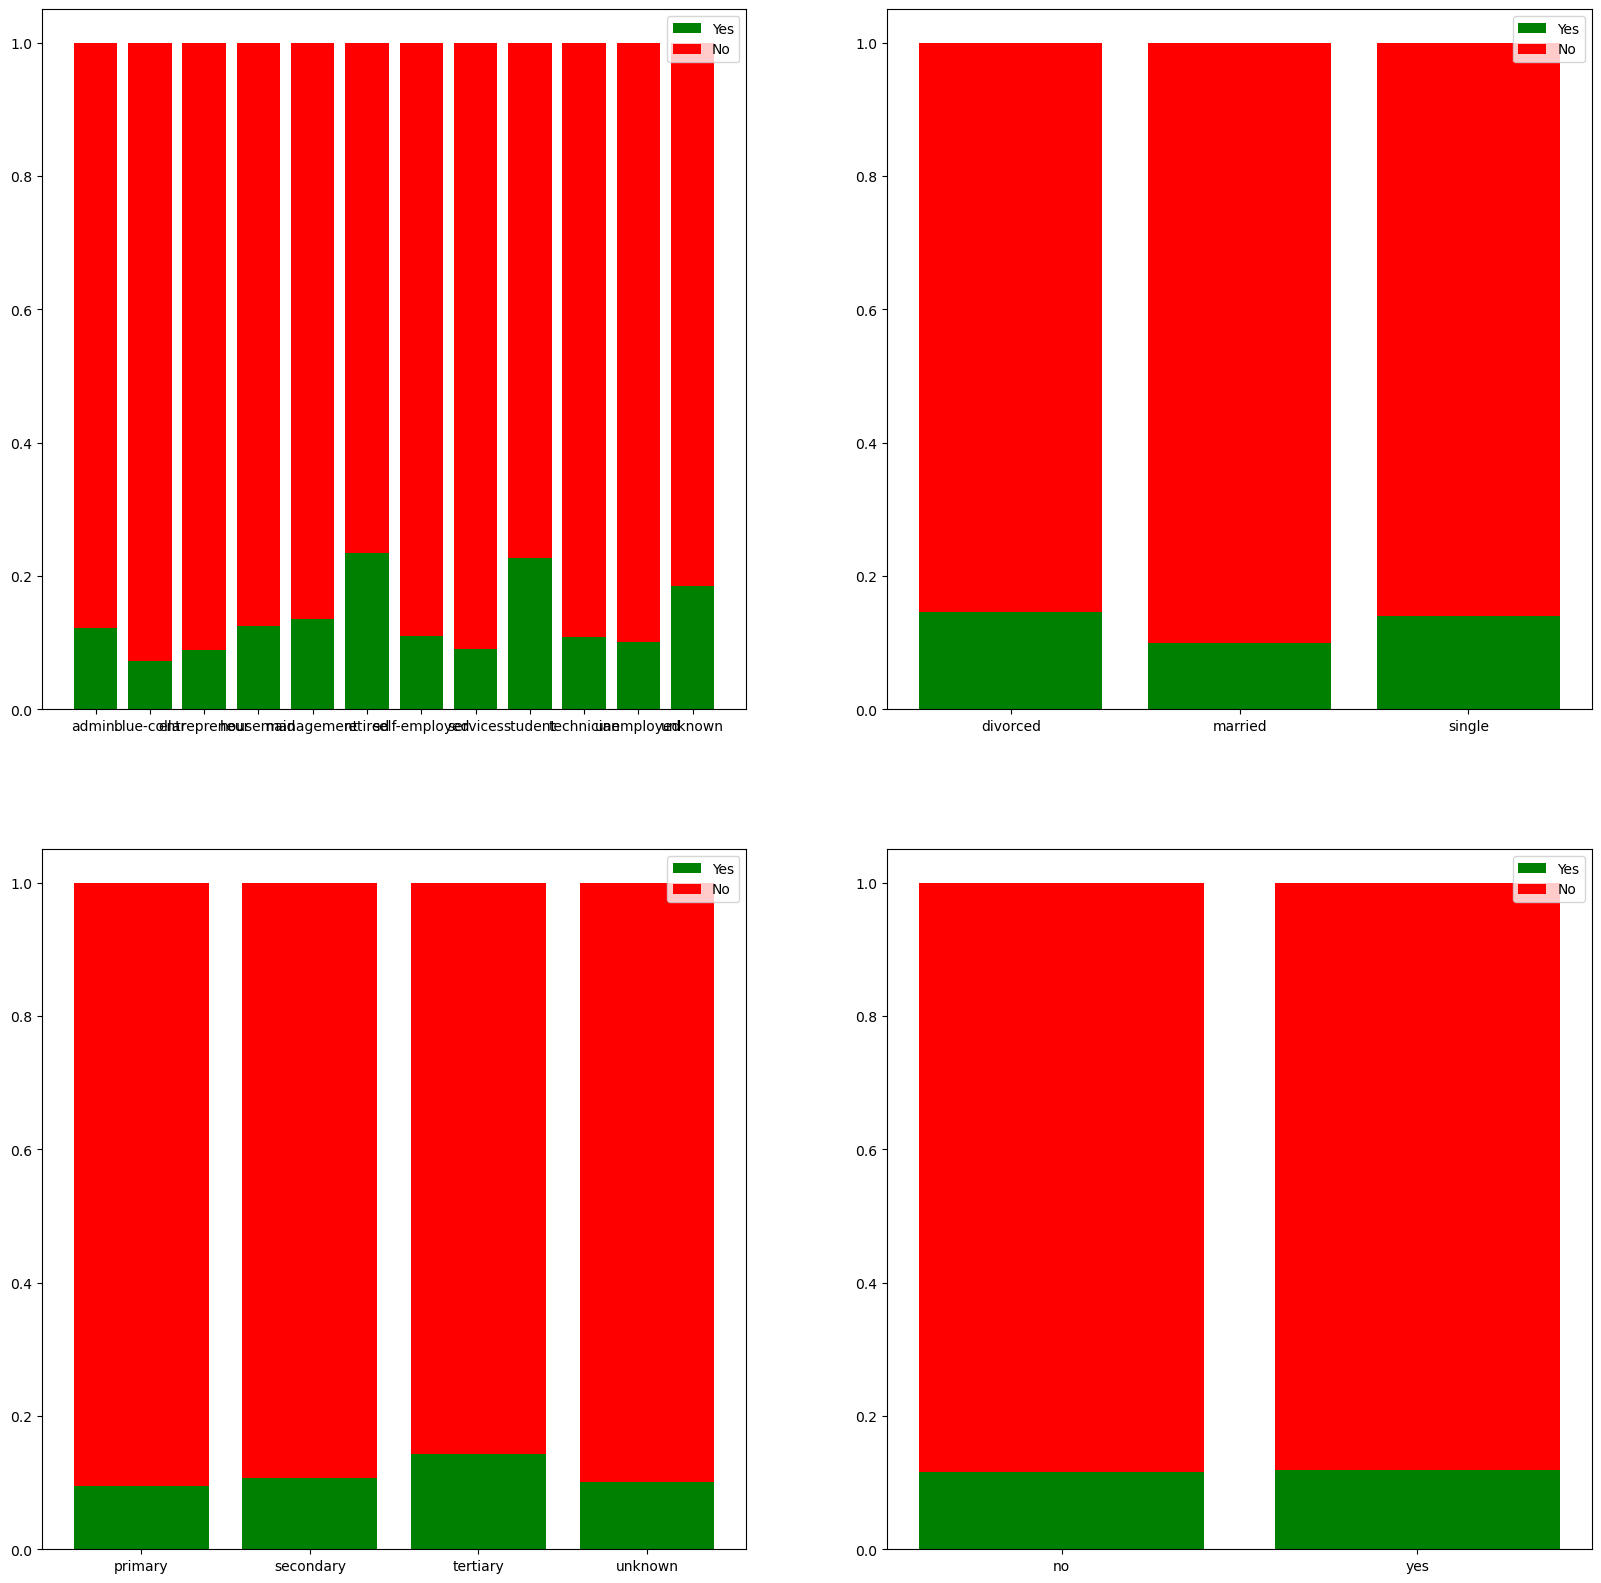

In [14]:
#Посмотрим на долю одобрений по разным категориям:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, column in enumerate(data[categorical].iloc[:, 0:4].columns):
    ax = axes[i // 2, i % 2]
    crosstab = pd.crosstab(data[column], data['y'])
    proportions = crosstab.div(crosstab.sum(1), axis=0)
    ax.bar(proportions.index, proportions['yes'], label='Yes', color='g')
    ax.bar(proportions.index, proportions['no'], label='No', bottom=proportions['yes'], color='r')
    ax.legend() 
plt.show()

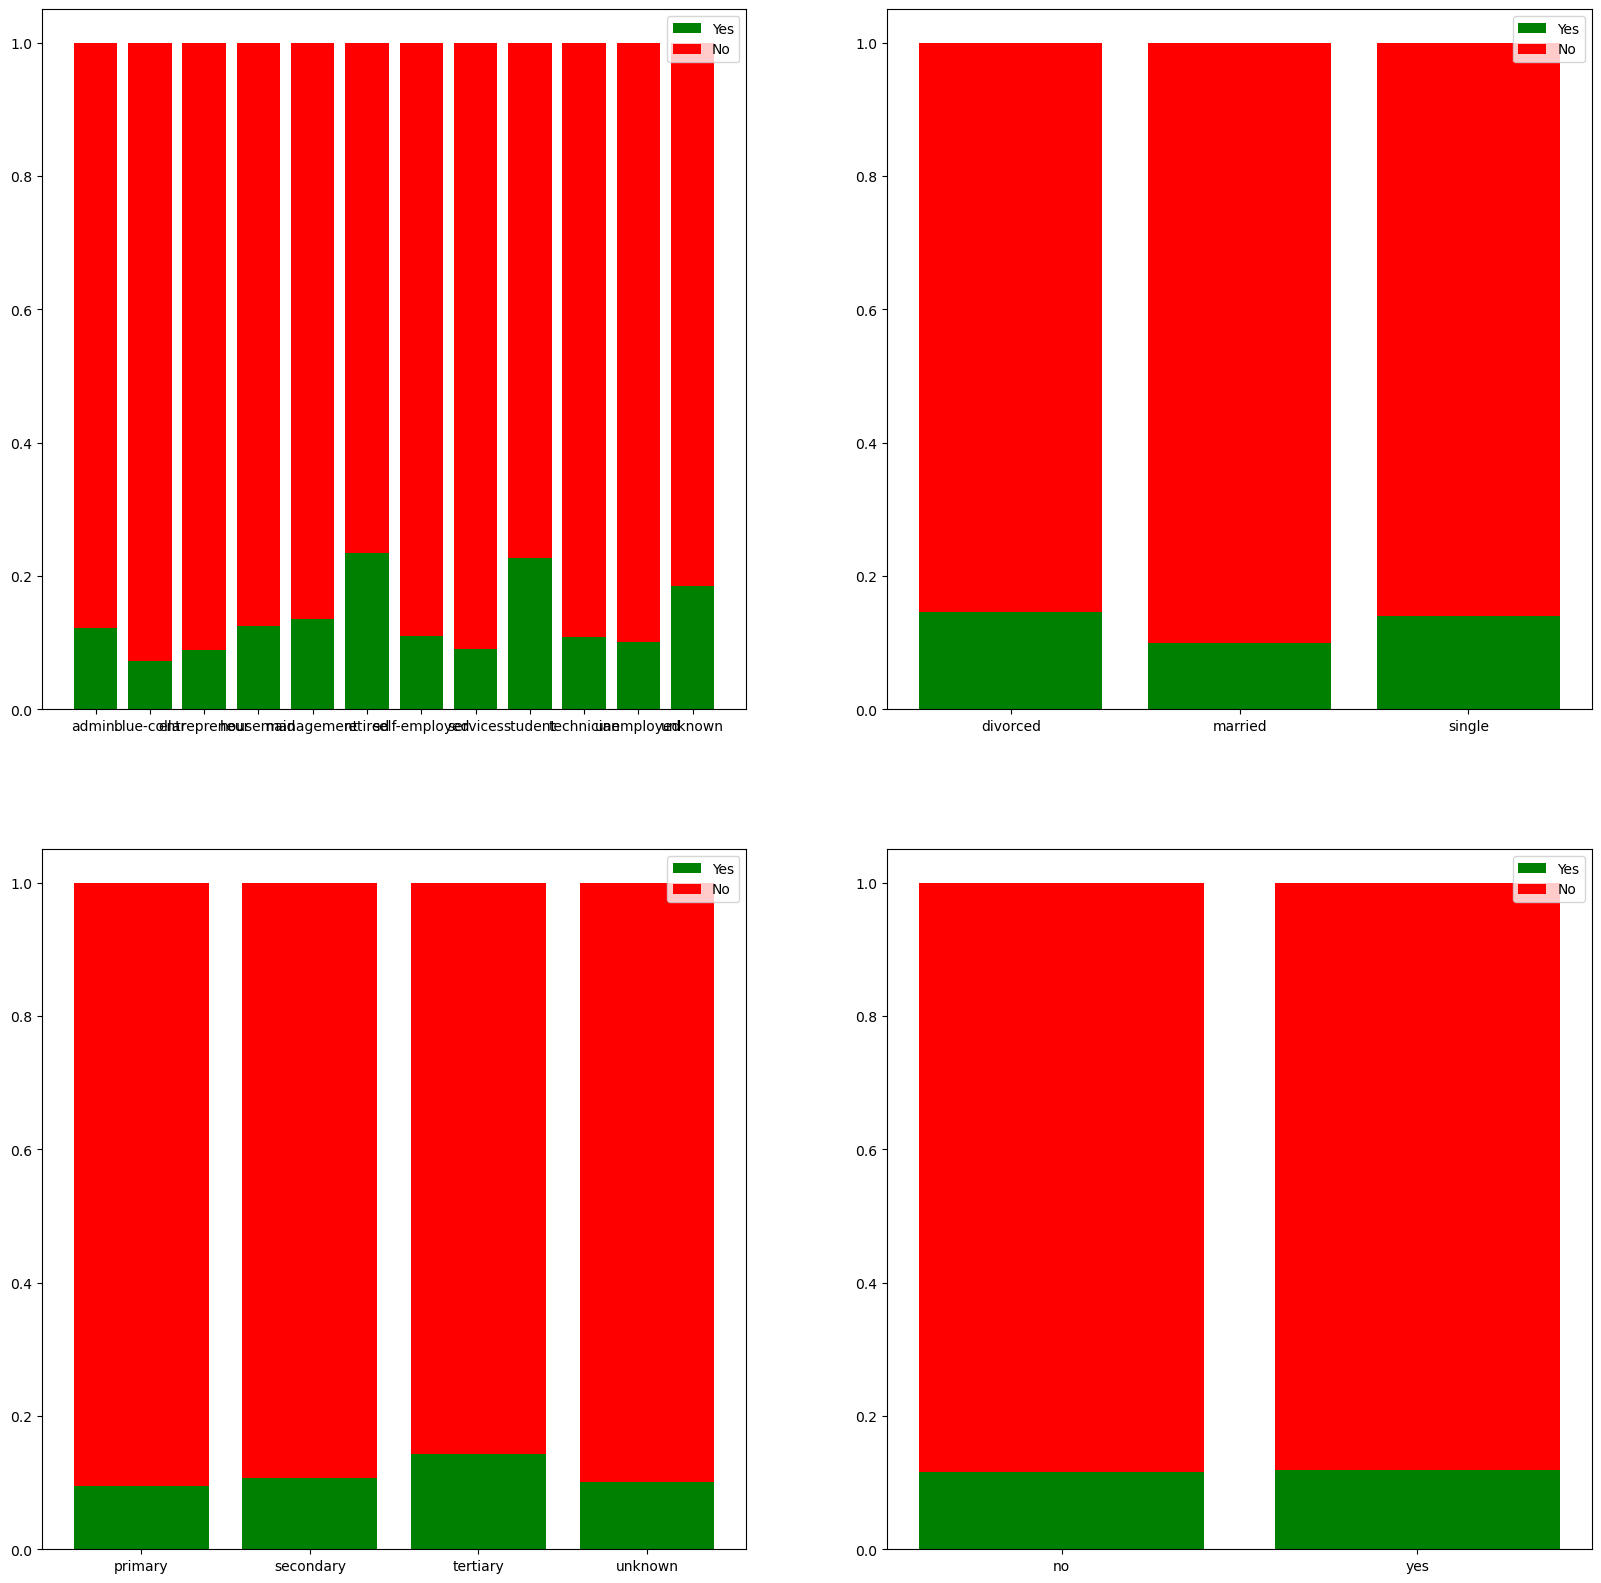

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, column in enumerate(data[categorical].iloc[:, 0:4].columns):
    ax = axes[i // 2, i % 2]
    crosstab = pd.crosstab(data[column], data['y'])
    proportions = crosstab.div(crosstab.sum(1), axis=0)
    ax.bar(proportions.index, proportions['yes'], label='Yes', color='g')
    ax.bar(proportions.index, proportions['no'], label='No', bottom=proportions['yes'], color='r')
    ax.legend() 
plt.show()

Подготовим данные к регрессии

In [16]:
#Проверим на нормальность:
from scipy.stats import shapiro
for column in numerical:
    x = shapiro(data[column])[1]
    if x > 0.05:
        print(f'{column} распределена нормально: {x}')
    else:
        print(f'{column} распределена НЕ нормально: {x}')

age распределена НЕ нормально: 9.387776147220147e-34
balance распределена НЕ нормально: 0.0
day распределена НЕ нормально: 2.4364199576424926e-33
duration распределена НЕ нормально: 0.0
campaign распределена НЕ нормально: 0.0
pdays распределена НЕ нормально: 0.0
previous распределена НЕ нормально: 0.0


In [17]:
#Нормализуем количественные данные:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
for  column in numerical:
    data[column]= scaler_standard.fit_transform(data[[column]])

In [18]:
#Переведём бинарные переменные в 0|1
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data['default'] = data['default'].map({'yes': 1, 'no': 0})

<AxesSubplot:>

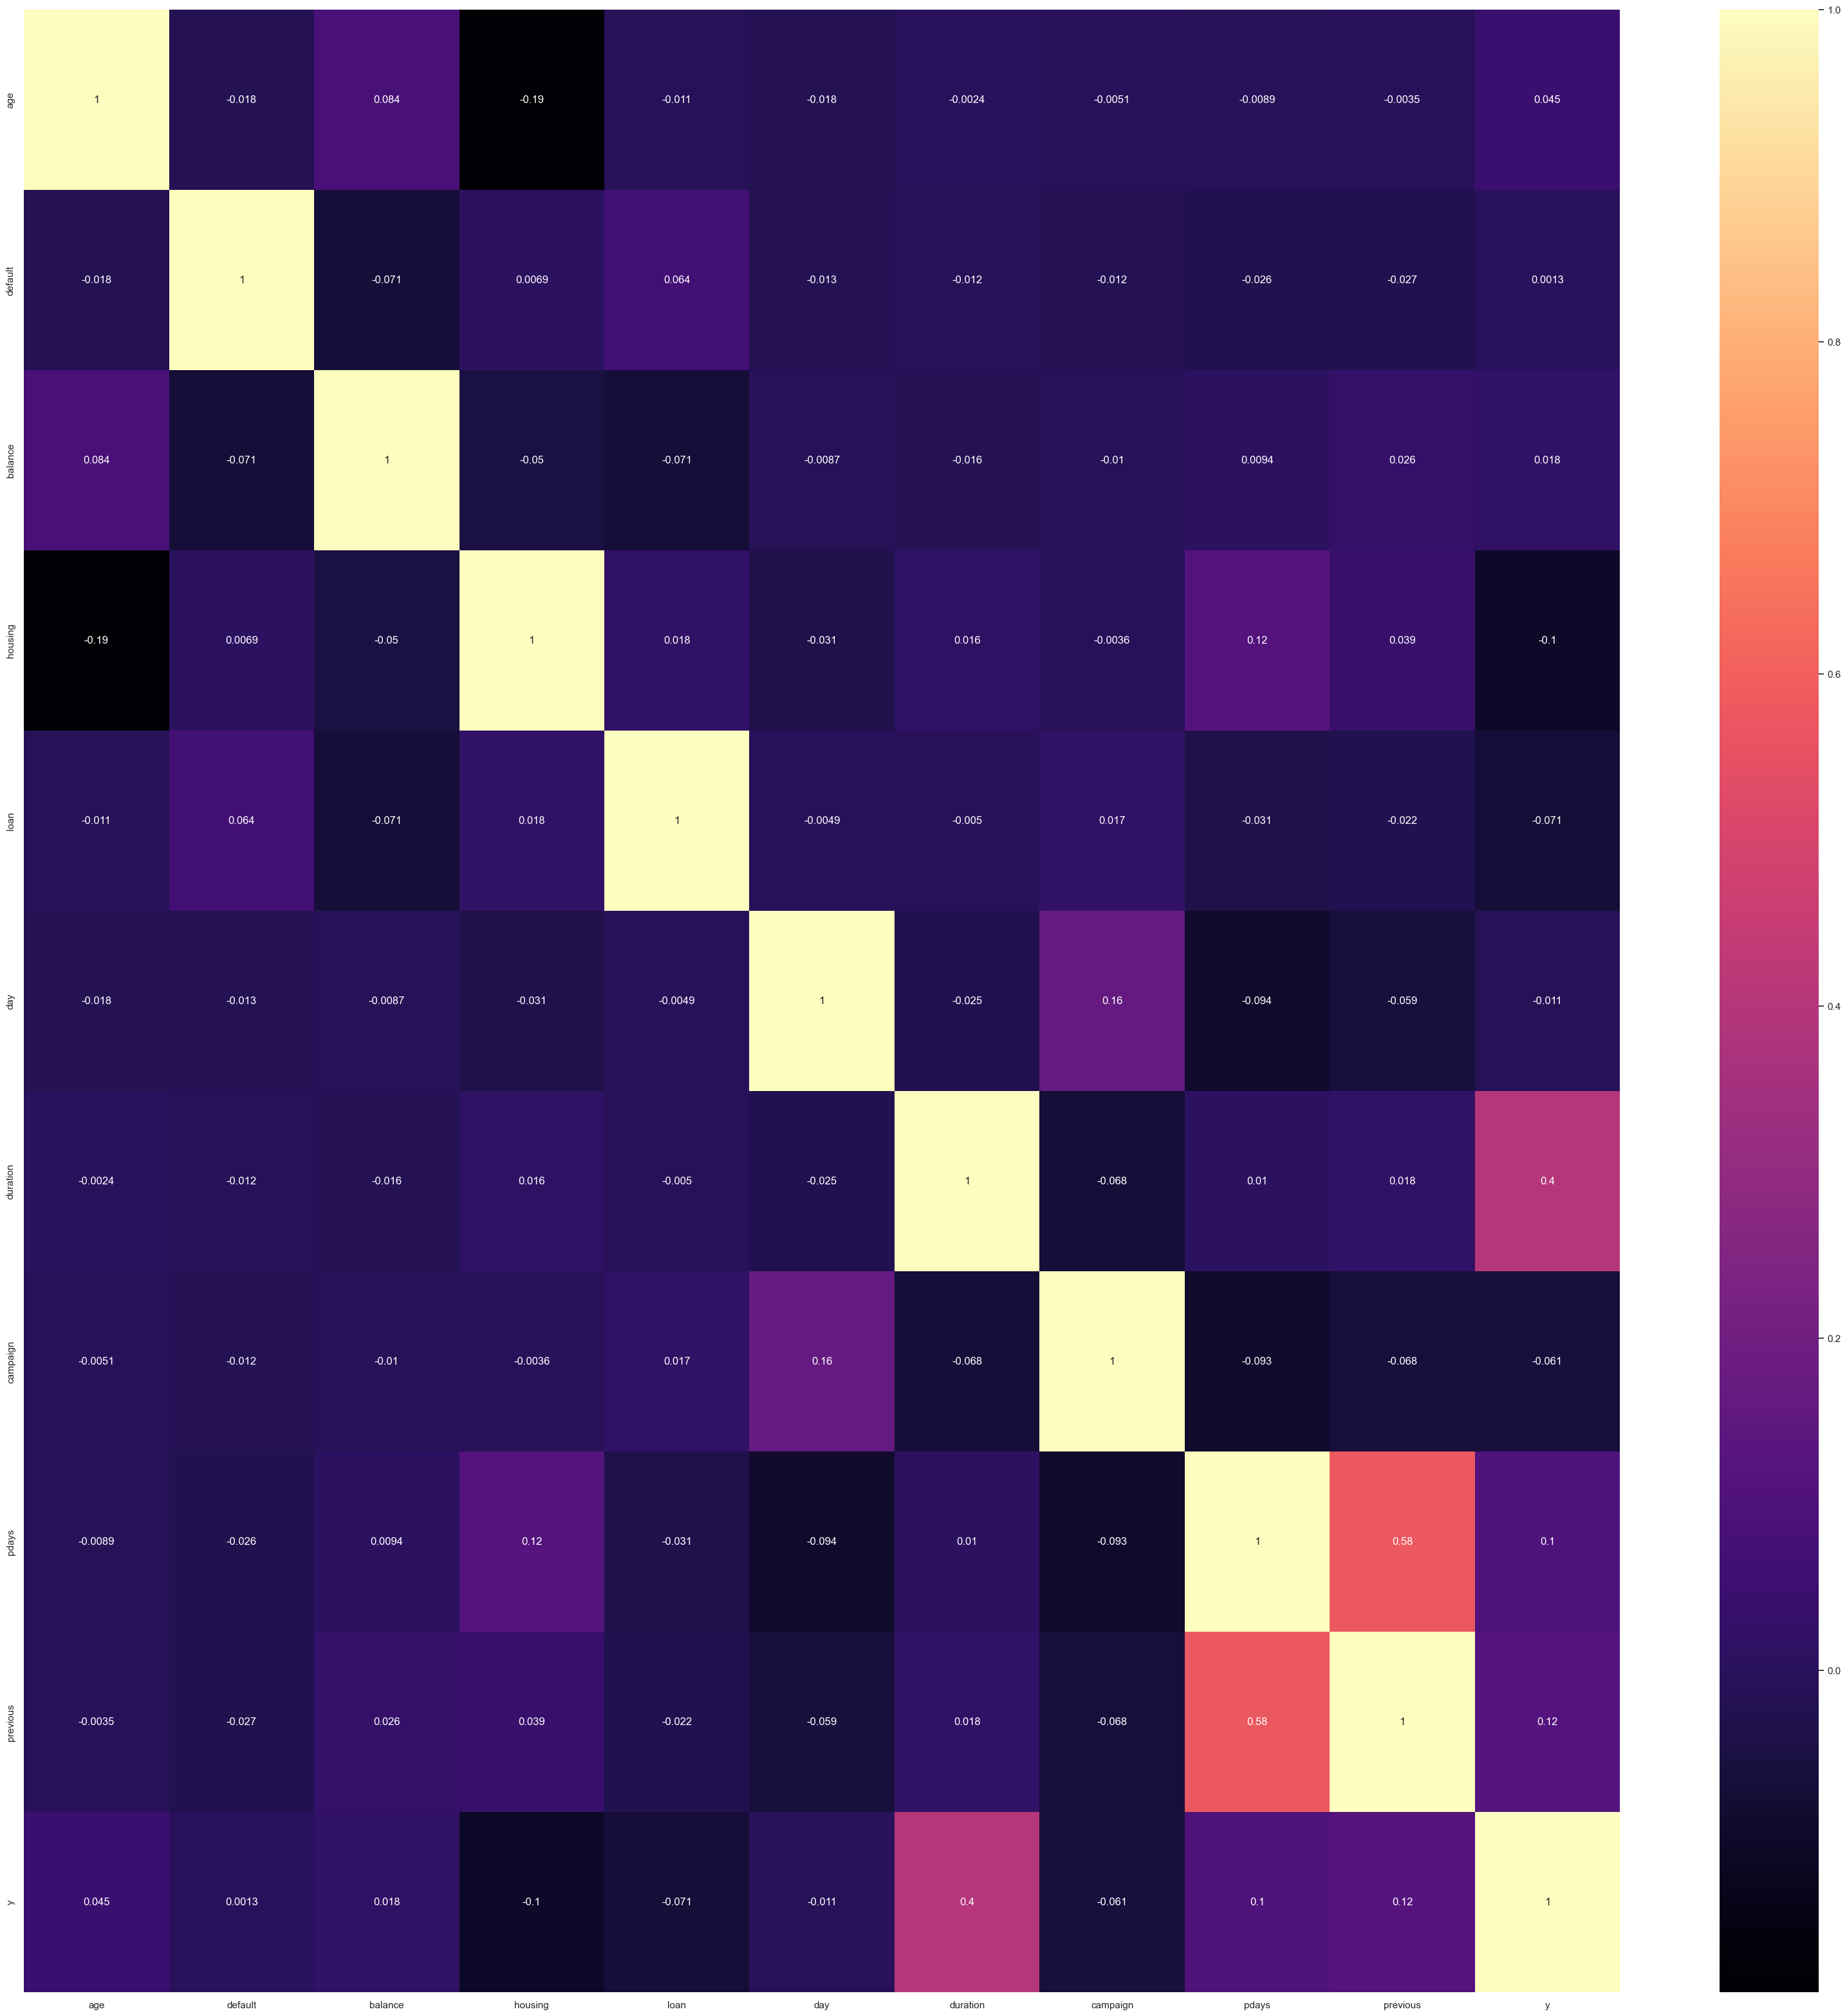

In [19]:
#Проверим корреляцию переменных
corr_data=data.corr()
corr_data
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(data.corr(), annot = True, cmap ='magma')

Видна отрицательная корелляция регрессанта с housing, корреляция с previous, duration, pdays
Похоже, что есть мультикооллинеарность pdays и previous, остальные переменные слабо коррелируют друг с другом, можно считать их независимыми

In [20]:
#Применим one-hot кодирование для категориальных переменных
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

In [21]:
#Разделим выборку на test и train
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = data.drop("y", axis=1)
y = data["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

Попробуем сделать линейную регрессию

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report
lr = LinearRegression().fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print('Coefficients:', lr.coef_)
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, lr.predict(x_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
print("R2:", lr.score(x_test, y_test))

Coefficients: [ 3.39548370e-03  4.90057861e-02 -6.83984503e-03 -1.65392601e-02
 -4.00373391e-02  8.27197552e-03  1.27002714e-01 -3.68099622e-03
  2.40356063e-03 -5.92149286e-03  8.92617626e+10  8.92617626e+10
  8.92617626e+10  8.92617626e+10  8.92617626e+10  8.92617626e+10
  8.92617626e+10  8.92617626e+10  8.92617626e+10  8.92617626e+10
  8.92617626e+10  8.92617626e+10 -5.26385138e+11 -5.26385138e+11
 -5.26385138e+11 -6.85217216e+11 -6.85217216e+11 -6.85217216e+11
 -6.85217216e+11  4.48240313e+10  4.48240313e+10  4.48240313e+10
  2.69606399e+10  2.69606399e+10  2.69606399e+10  2.69606399e+10
  2.69606399e+10  2.69606399e+10  2.69606399e+10  2.69606399e+10
  2.69606399e+10  2.69606399e+10  2.69606399e+10  2.69606399e+10
 -6.28689657e+10 -6.28689657e+10 -6.28689657e+10 -6.28689657e+10]
Train RMSE: 0.2687893688044839
Test RMSE: 0.2720562356059251
R2: 0.31746752902803665


Линейная модель показала плохой результат на предсказание одобрения, посмотрим сможет ли линейная модель предсказать баланс аккаунта

In [23]:
x = data.drop("balance", axis=1)
y = data["balance"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print('Coefficients:', lr.coef_)
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, lr.predict(x_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
print("R2:", lr.score(x_test, y_test))

Coefficients: [ 8.58153809e-02 -4.61723313e-01 -2.46028401e-02 -1.47854977e-01
 -4.42320987e-03 -9.91380783e-03  1.42989644e-02 -2.97297519e-02
  1.34648953e-02 -9.19414639e-02 -3.08173285e+10 -3.08173285e+10
 -3.08173285e+10 -3.08173285e+10 -3.08173285e+10 -3.08173285e+10
 -3.08173285e+10 -3.08173285e+10 -3.08173285e+10 -3.08173285e+10
 -3.08173285e+10 -3.08173285e+10 -6.84441289e+11 -6.84441289e+11
 -6.84441289e+11  7.89802212e+11  7.89802212e+11  7.89802212e+11
  7.89802212e+11 -6.37080299e+10 -6.37080299e+10 -6.37080299e+10
 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09
 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09
 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09 -8.11128442e+09
  9.92574100e+10  9.92574100e+10  9.92574100e+10  9.92574100e+10]
Train RMSE: 0.9786749852722331
Test RMSE: 0.9446972921394001
R2: 0.0012521893060589706


Полное фиаско

In [24]:
from sklearn.ensemble import RandomForestRegressor
x = data.drop("y", axis=1)
y = data["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

rf = RandomForestRegressor().fit(x_train, y_train)

train_rmse = np.sqrt(mean_squared_error(y_train, rf.predict(x_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(x_test)))

print("Train Set RMSE:", train_rmse)
print("Test Set RMSE:", test_rmse)
print("R2 Score:", rf.score(x_test, y_test))

Train Set RMSE: 0.09847636278086572
Test Set RMSE: 0.26687220439877773
R2 Score: 0.3432310169338857


Случайный лес показал плохой результат, что вероятно связано с отсутствием чётких кластеров и линейных зависимостей

In [25]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=1)

print(f"Accuracy: {accuracy}")
print("Матрица ошибок")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(logistic_model.coef_)

Accuracy: 0.9049723756906077
Матрица ошибок
[[772  21]
 [ 65  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       793
           1       0.69      0.42      0.52       112

    accuracy                           0.90       905
   macro avg       0.81      0.70      0.73       905
weighted avg       0.89      0.90      0.89       905

[[ 0.00192053  0.40560732 -0.06836505 -0.29846448 -0.7272188   0.0505343
   1.13151545 -0.23752912  0.07305035 -0.06148686 -0.00775229 -0.34930982
  -0.23466842 -0.30897085 -0.10474212  0.73497309 -0.04730215  0.02444033
   0.44788308 -0.15104758 -0.49973097  0.4961888   0.12731693 -0.13551173
   0.00815591 -0.05426883 -0.0579853   0.37783602 -0.26562078  0.40548149
   0.37467025 -0.78019062  0.00669217 -0.3536864   0.07588981  0.01621144
  -0.86487108 -0.64742091  0.22532578  1.22646213 -0.61991845 -0.66088688
   1.06823161  0.52793187 -0.59622775 -0.22508251  1.56479124 -0.7

Сразу видно, что задача классификации (хоть это и так было понятно), логистическая регрессия показывает очень хороший результат

Посмотрим на коэффициенты

In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 11
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.327      
Dependent Variable:       y                     AIC:                   2259.6513  
Date:                     2023-10-26 11:52      BIC:                   2535.5603  
No. Observations:         4521                  Log-Likelihood:        -1086.8    
Df Model:                 42                    LL-Null:               -1615.5    
Df Residuals:             4478                  LLR p-value:           3.1186e-194
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           11.0000                                                 
----------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------

    Видим, что статистически значимыми показателями являются: loan, day, duration, campaign. (housing близок к p < 5)
    Большинство переменных статистически незначимы

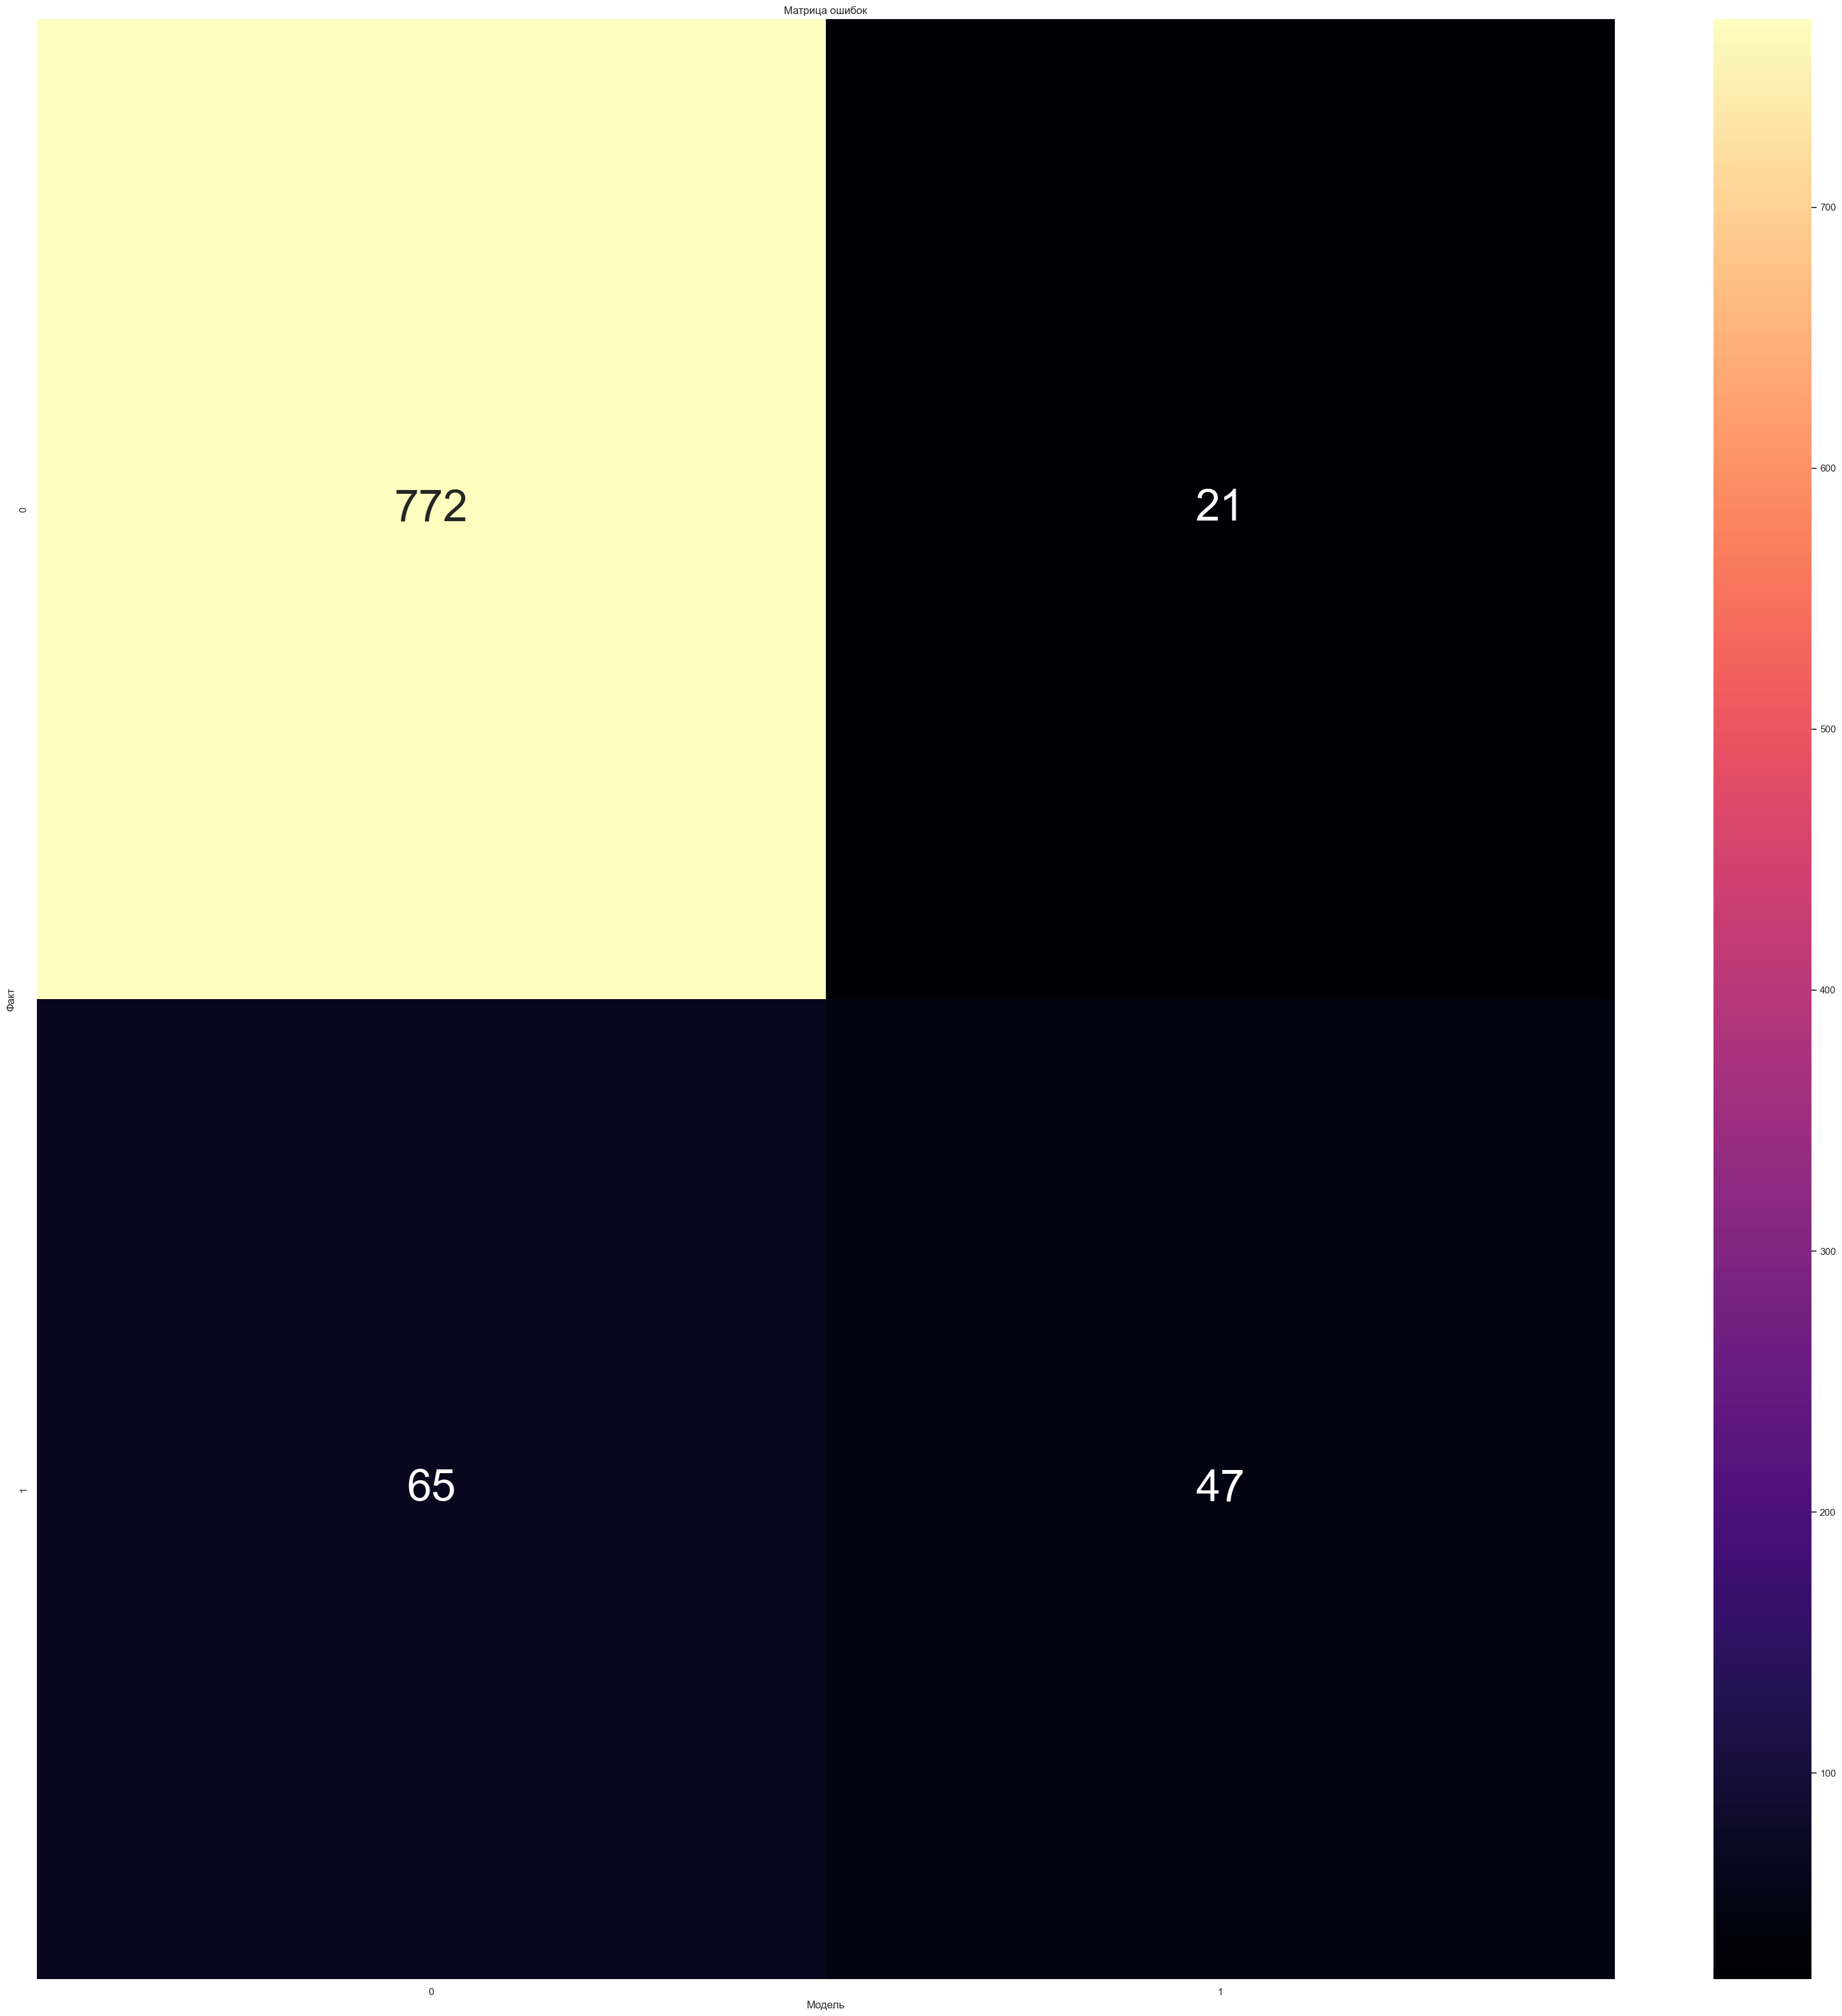

In [27]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma',annot_kws={"fontsize":50})
plt.xlabel('Модель')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

Кластеризация методом KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=1)

print(f"Accuracy: {accuracy}")
print("Матрица ошибок")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8895027624309392
Матрица ошибок
[[772  21]
 [ 79  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       793
           1       0.61      0.29      0.40       112

    accuracy                           0.89       905
   macro avg       0.76      0.63      0.67       905
weighted avg       0.87      0.89      0.87       905



D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
